In [1]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt

In [2]:
transition_matrix = [[1/4, 1/4, 1/4, 1/4],
                     [1/3, 1/3, 0, 1/3],
                     [1/3, 1/6, 1/6, 1/3],
                     [1/3, 1/9, 2/9, 1/3]]

notes = [-20, 15, 10, -5]

In [3]:
def simulate():

    running_state_idx = [choice(list(range(len(notes))))]
    print(running_state_idx)
    curr_idx = 0
    avg_earnings = [notes[curr_idx]]
    tot_earnings = avg_earnings[-1]

    for _ in range(1000000):
        p = np.random.random()
        curr_probs = transition_matrix[running_state_idx[-1]]
        for idx,prob in enumerate(curr_probs):
            if p <= sum(curr_probs[:idx+1]):
                running_state_idx.append(idx)
                break
        tot_earnings += notes[running_state_idx[-1]]
        avg_earnings.append(tot_earnings / len(running_state_idx))
        
    return avg_earnings[10000:], running_state_idx[10000:]

In [4]:


# transition_matrix = [[0,1/2,1/2,0,0,0,0,0,0,0],
#                      [0,0,1/2,1/2,0,0,0,0,0,0],
#                      [0,0,0,1/2,1/2,0,0,0,0,0],
#                      [0,0,0,0,1/2,1/2,0,0,0,0],
#                      [0,0,0,0,0,1/2,1/2,0,0,0],
#                      [0,0,0,0,0,0,1/2,1/2,0,0],
#                      [0,0,0,0,0,0,0,1/2,1/2,0],
#                      [0,0,0,0,0,0,0,0,1/2,1/2],
#                      [0,0,0,0,0,0,0,0,0,1],
#                      [0,0,0,0,0,0,0,0,0,1]]
# payouts = [-1, 2]
# def simulate():

#     running_state_idx = [choice(list(range(len(payouts))))]
#     print(running_state_idx)
#     curr_idx = 0
#     avg_earnings = [payouts[curr_idx]]
#     tot_earnings = avg_earnings[-1]

#     for _ in range(1000000):
#         p = np.random.random()
#         curr_probs = transition_matrix[running_state_idx[-1]]
#         for idx,prob in enumerate(curr_probs):
#             if p <= sum(curr_probs[:idx+1]):
#                 running_state_idx.append(idx)
#                 break
#         tot_earnings += payouts[running_state_idx[-1]]
#         avg_earnings.append(tot_earnings / len(running_state_idx))
        
#     return avg_earnings[10000:], running_state_idx[10000:]


[1]
[3]
[3]
[3]
[1]


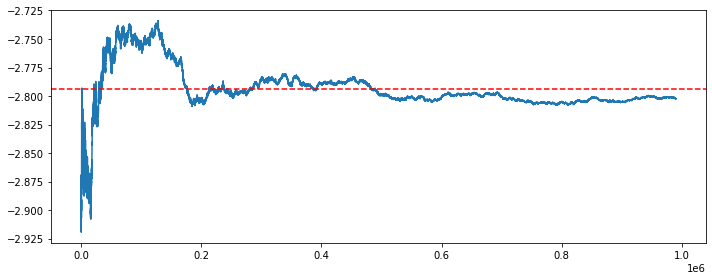

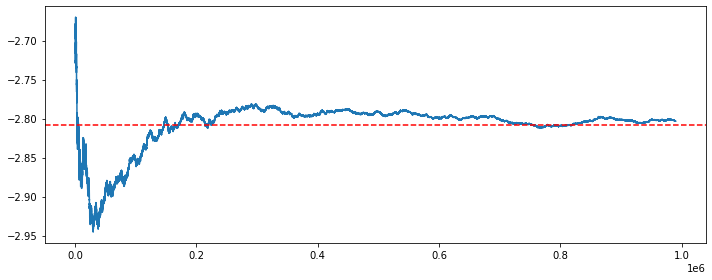

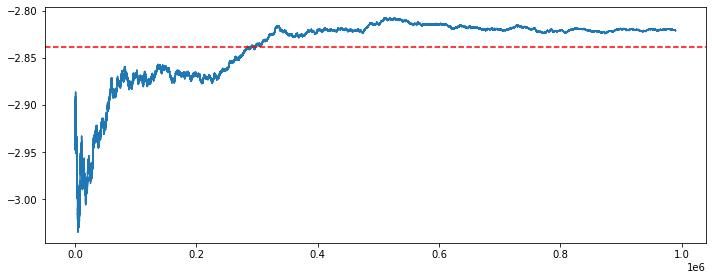

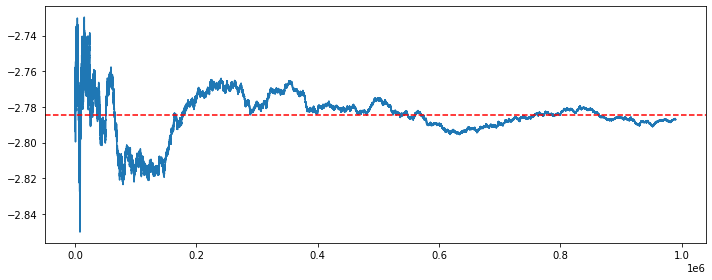

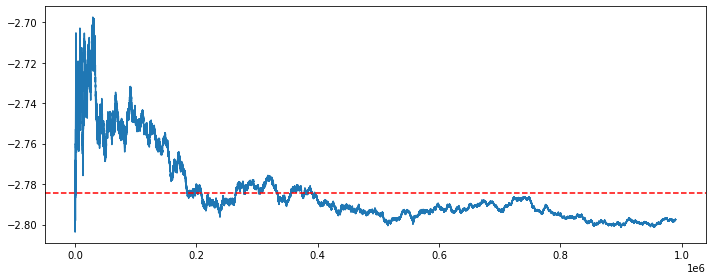

In [5]:
running_states = []
for i in range(5):
    avg_earnings, running_states = simulate()

    plt.figure(figsize=(10,4))
    plt.plot(avg_earnings)
    plt.axhline(np.mean(avg_earnings), color='r', linestyle='--')
    plt.tight_layout()


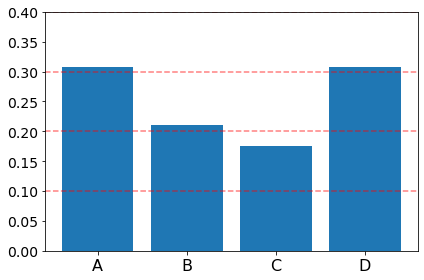

In [6]:
pcts = []
for i in np.unique(running_states):
    pcts.append(np.mean(np.array(running_states) == i))
plt.bar(['A','B','C','D'], pcts)
plt.xticks(['A','B','C','D'], fontsize=16)
plt.yticks(np.arange(0,.45,.05), fontsize=14)
plt.axhline(.4, color='r', linestyle='--', alpha=0.5)
plt.axhline(.1, color='r', linestyle='--', alpha=0.5)
plt.axhline(.2, color='r', linestyle='--', alpha=0.5)
plt.axhline(.3, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('board_game_props.png')